## Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
 
df = pd.read_csv('developer_dataset.csv')

print(df.head()) 
print(df.columns)

   RespondentID  Year        Country          Employment  \
0             1  2018  United States  Employed full-time   
1             1  2019  United States  Employed full-time   
2             1  2020  United States  Employed full-time   
3             2  2018  United States  Employed full-time   
4             2  2019  United States  Employed full-time   

                                      UndergradMajor  \
0  Computer science, computer engineering, or sof...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                                             DevType  \
0           Engineering manager;Full-stack developer   
1                              Developer, full-stack   
2                                                NaN   
3                               Full-stack developer   
4  Data or business an

/var/folders/75/lyw_2gw520g01lbc7x5jmbd4wpgvj8/T/ipykernel_4218/1374737483.py:4: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


In [2]:
print(df.count())
df.shape
num_of_obvs = len(df)

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64


We clearly have a lot of missing data.

In [3]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


## Handling highly missing data


First, let's find out the percentage of missing data for each column.

In [4]:
print(f'Percentage of missing data for each column')
print((100*(num_of_obvs - df.count()))/num_of_obvs)

Percentage of missing data for each column
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


We can see that NEWJobHunt, NEWJobHuntResearch, and NEWLearn all have greater thatn 60% data missing. Therefore, let's drop those.

In [5]:
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'], 
        axis=1, 
        inplace=True)



In [6]:
df.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs'],
      dtype='object')

## Analysing developers by country


In [7]:
num_of_devs_country = df[['RespondentID', 'Country']].groupby('Country').count().reset_index()

print(num_of_devs_country.dtypes)

Country         object
RespondentID     int64
dtype: object


In [8]:
missing_data = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()

df_temp = num_of_devs_country.merge(missing_data, left_on='Country', right_on='Country')

df_temp['Employment_missing_data_%'] = df_temp.apply(
    lambda row: (row.Employment/row.RespondentID)*100, axis=1)
df_temp['DevType_missing_data_%'] = df_temp.apply(
    lambda row: (row.DevType/row.RespondentID)*100, axis=1)

print(df_temp)

          Country  RespondentID  Employment  DevType  \
0          Canada          8979         148      944   
1           China          2072         139      491   
2          France          6861         104      848   
3         Germany         16215         386     1691   
4           Japan          1049          13      109   
5          Mexico          1918          25      207   
6           Spain          4534          74      434   
7  United Kingdom         15854         196     1472   
8   United States         53727         699     4580   

   Employment_missing_data_%  DevType_missing_data_%  
0                   1.648290               10.513420  
1                   6.708494               23.696911  
2                   1.515814               12.359714  
3                   2.380512               10.428615  
4                   1.239276               10.390848  
5                   1.303441               10.792492  
6                   1.632113                9.572122  

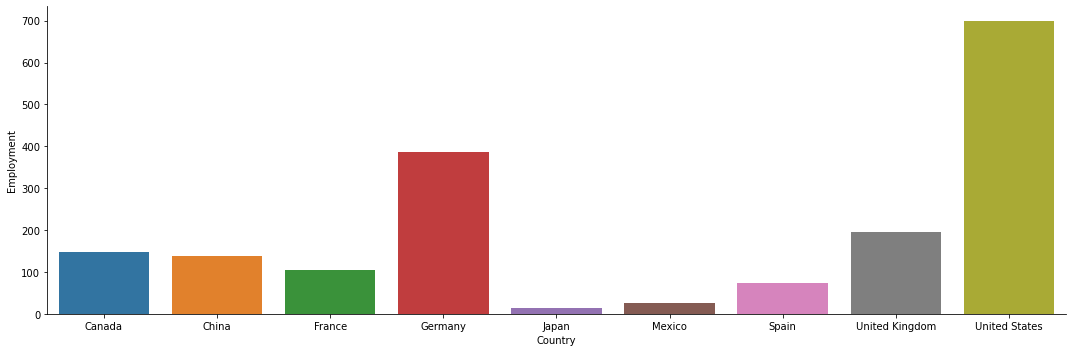

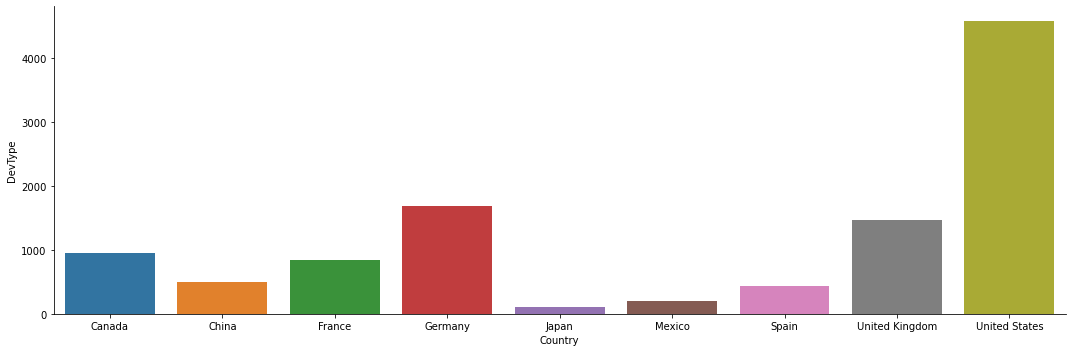

In [9]:
A=sns.catplot(
    data=missing_data, kind="bar",
    x="Country", y="Employment",
    height =5, aspect = 3)

B=sns.catplot(
    data=missing_data, kind="bar",
    x="Country", y="DevType",
    height = 5, aspect = 3)

We see that, with the exception to China, all countries have roughly the same percentage of DevType and Employment missing data when compared to eh country's total developers. 

For the purpose of the exercise, we assume that the missing data in these two columns is missing completely at random (MCAR)

In [10]:
 df.dropna(subset=['DevType', 'Employment'], inplace=True, how='any')

In [32]:
len(df)

99975

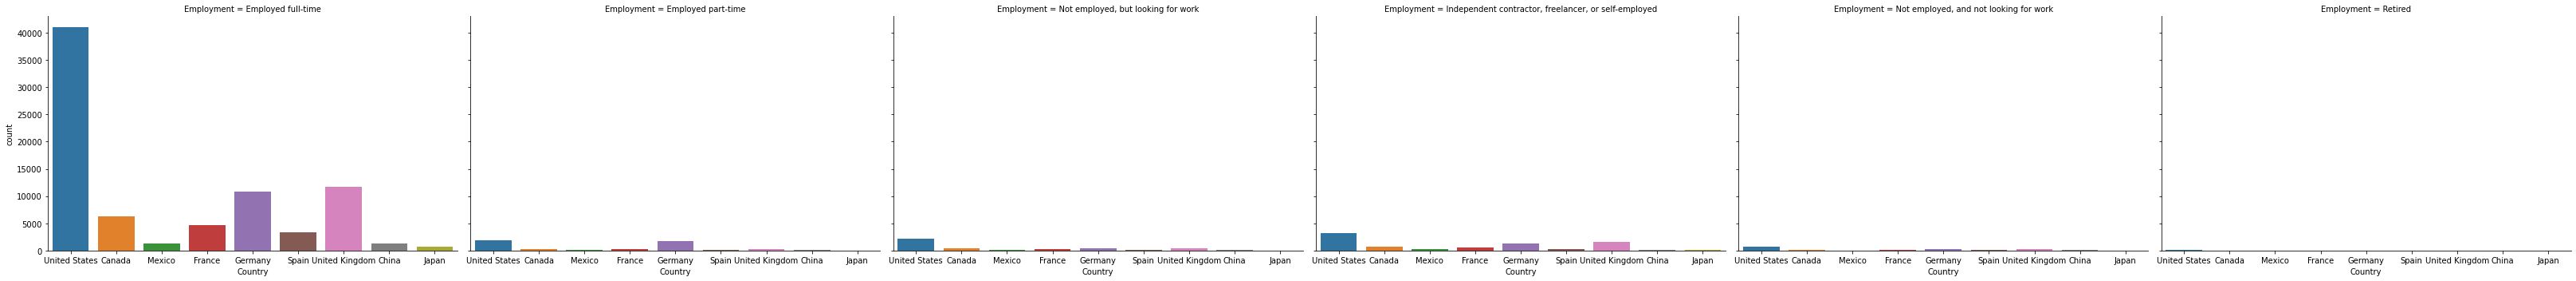

In [11]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=5, aspect=1.5);

In [28]:
devdf = df[['Country','DevType']]

devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars=['Country'], 
                  value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
                  var_name='Dev_category',
                  value_name='Dev_flag')

#print(dev['Dev_category'].value_counts())


/var/folders/75/lyw_2gw520g01lbc7x5jmbd4wpgvj8/T/ipykernel_4218/2538786890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
/var/folders/75/lyw_2gw520g01lbc7x5jmbd4wpgvj8/T/ipykernel_4218/2538786890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
/var/folders/75/lyw_2gw520g01lbc7x5jmbd4wpgvj8/T/ipykernel_4218/2538786890.py:5: SettingWithCopyWarning: 
A value 

In [33]:
print(devdf.Dev_category.value_counts())
devdf.dropna(how='any', inplace=True)
devdf.Dev_category.value_counts()

BackEnd      99975
FrontEnd     99975
FullStack    99975
Mobile       99975
Admin        99975
Name: Dev_category, dtype: int64


FullStack    32494
BackEnd      29588
FrontEnd     19491
Admin        18818
Mobile        8754
Name: Dev_category, dtype: int64

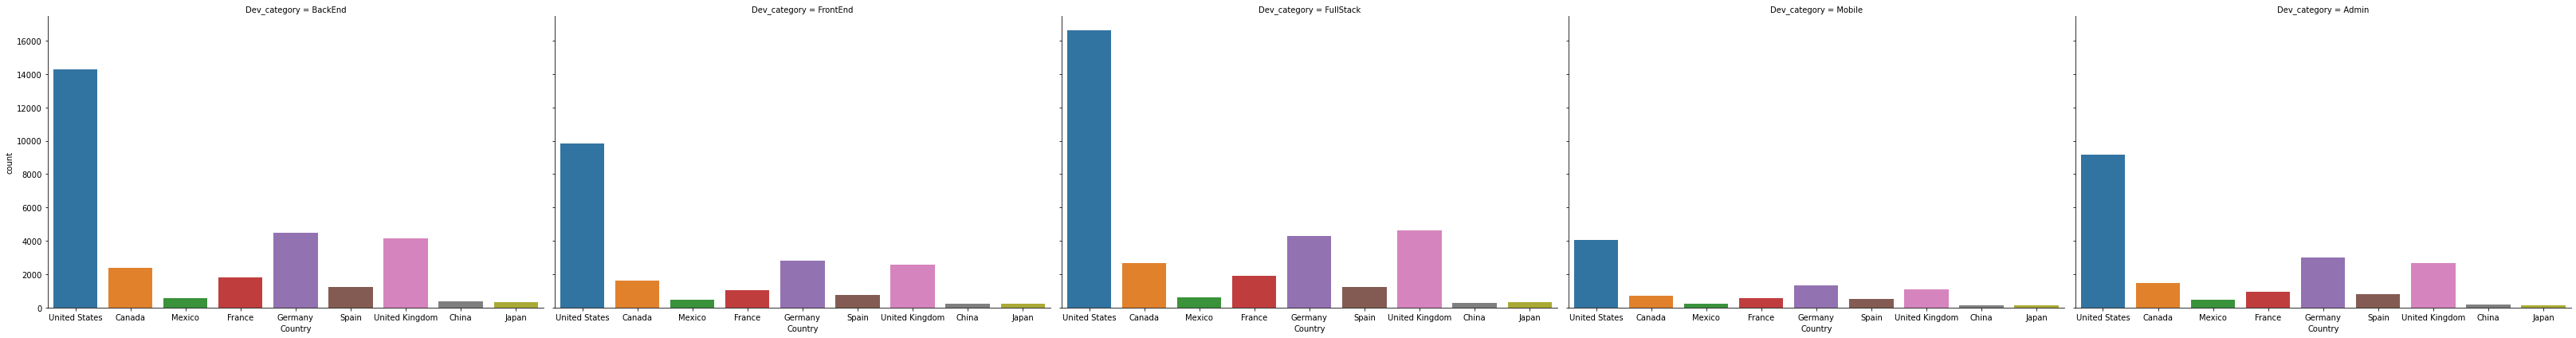

In [40]:
devFig = sns.catplot(data=devdf, 
                     x='Country', 
                     kind='count', 
                     col='Dev_category',
                    height=6,
                    aspect=1.5)

## Investigating developer undergraduate majors

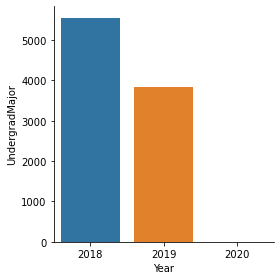

In [41]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

In [43]:
df = df.sort_values(['RespondentID','Year'])
#Every respondent filled in what they majored in in 2020, we can therefore backfill the null entries in 2018 and 2019.

In [44]:
df['UndergradMajor'].bfill(axis=0, inplace=True)

In [75]:
majors = ['social_science','natural_science','computer_science','development','another_engineering','never_declared']

edudf = df[['Year', 'UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'social_science'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'natural_science'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'computer_science'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'development'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'another_engineering'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'never_declared'] = True

edudf = edudf.melt(id_vars=['Year'], 
                  value_vars= majors,
                  var_name='major_category',
                  value_name='major_flag')




/var/folders/75/lyw_2gw520g01lbc7x5jmbd4wpgvj8/T/ipykernel_4218/740050140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
/var/folders/75/lyw_2gw520g01lbc7x5jmbd4wpgvj8/T/ipykernel_4218/740050140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'social_science'] = True
/var/folders/75/lyw_2gw520g01lbc7x5jmbd4wpgvj8/T/ipykernel_4218/740050140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [82]:
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','major_category']).count().reset_index()
print(edudf.head())

   Year       major_category  major_flag
0  2018  another_engineering        3054
1  2018     computer_science       24413
2  2018          development        1097
3  2018      natural_science        2171
4  2018       never_declared         487


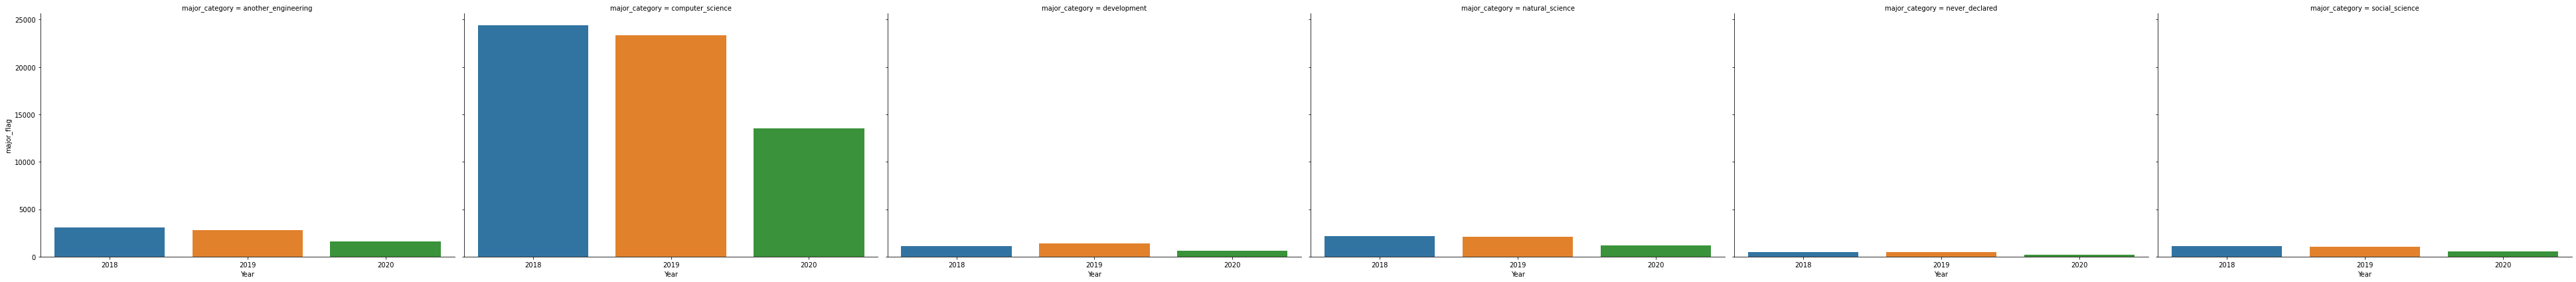

In [84]:
eduFig = sns.catplot(x="Year", y='major_flag', col="major_category",
                data=edudf, kind="bar",
                height=6, aspect=1.5)

People entering a devolepment role significantly decresed in 2020 compared to the previous two yea